In [185]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

A = pd.read_csv("lasso_example.txt",header=None)

x=A.values[:,1]
X=A.values[:,0:4]
y=A.values[:,4]

In [186]:
parameters={
    'alpha': [1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,  1.e-00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07]
}
lasso_coefficients = []
mse = []

for alpha in parameters['alpha']:
    lasmodel = Lasso(alpha=alpha, fit_intercept=False)#, tol=0.1)
    lasmodel.fit(X, y)
    lasso_coefficients.append(lasmodel.coef_)
    y_pred = lasmodel.predict(X)
    mse.append(mean_squared_error(y, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.028e-01, tolerance: 1.348e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.018e-02, tolerance: 1.348e-03
  model = cd_fast.enet_coordinate_descent(


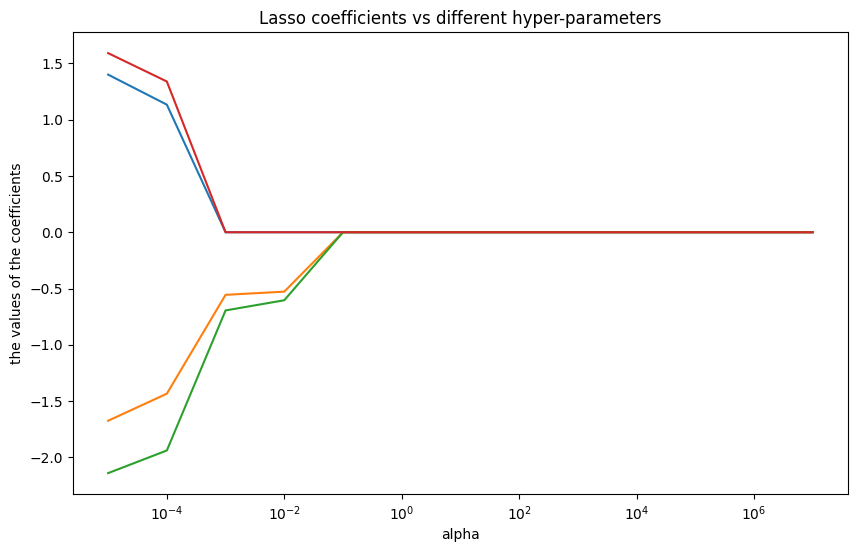

In [187]:
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(parameters['alpha'], lasso_coefficients)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('the values of the coefficients')
plt.title('Lasso coefficients vs different hyper-parameters')
plt.show()

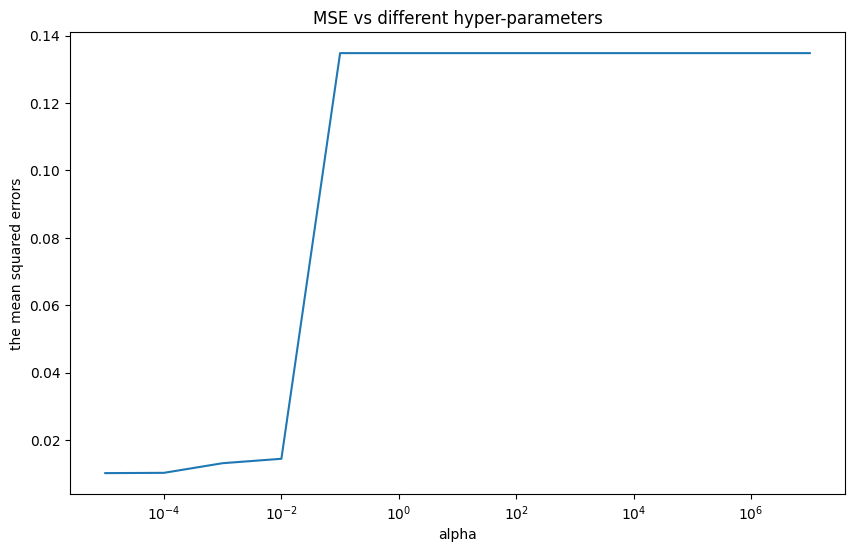

In [188]:
plt.figure(figsize=(10, 6))
plt.plot(parameters['alpha'], mse)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('the mean squared errors')
plt.title('MSE vs different hyper-parameters')
plt.show()


In [189]:
train_df = pd.read_csv("auto-mpg.data-original_", header=None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'], sep='\s+', na_values='?')
train_df = train_df.dropna().reset_index(drop=True)
train_df['horsepower'] = train_df['horsepower'].astype(float)

In [190]:
training_columns = ['cylinders','displacement','horsepower','weight',
                    'acceleration','model']
X = train_df[training_columns]
y = train_df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [191]:
degrees = [1, 2, 3, 4, 5]
parameters = {
    'alpha': [1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]
}

In [192]:
def model_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, mape, r2

In [193]:
ridge_results = []
ridge_metrics = []
lasso_results = []
lasso_metrics = []
for degree in degrees:
    std = StandardScaler().fit(X_train)
    X_train_std = std.transform(X_train)
    poly= PolynomialFeatures(degree=degree)
    X_train_std_poly = poly.fit_transform(X_train_std)
    model = Ridge(max_iter=1000, random_state=0)
    clf = GridSearchCV(model, parameters, cv=10)
    result = clf.fit(X_train_std_poly, y_train)
    result = pd.DataFrame(clf.cv_results_)
    result = result[['param_alpha', 'mean_test_score']]
    ridge_results.append([degree, result['param_alpha'], result['mean_test_score']])

In [194]:
for degree in degrees:
    std = StandardScaler().fit(X_train)
    X_train_std = std.transform(X_train)
    poly= PolynomialFeatures(degree=degree)
    X_train_std_poly = poly.fit_transform(X_train_std)
    model = Lasso(max_iter=1000, random_state=0)
    clf = GridSearchCV(model, parameters, cv=10)
    result = clf.fit(X_train_std_poly, y_train)

    result = pd.DataFrame(clf.cv_results_)
    result = result[['param_alpha', 'mean_test_score']]
    lasso_results.append([degree, result['param_alpha'], result['mean_test_score']])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.758e+02, tolerance: 1.613e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.682e+02, tolerance: 1.522e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.985e+02, tolerance: 1.596e

In [195]:
lasso_results

[[1,
  0      0.000001
  1       0.00001
  2        0.0001
  3         0.001
  4          0.01
  5           0.1
  6           1.0
  7          10.0
  8         100.0
  9        1000.0
  10      10000.0
  11     100000.0
  12    1000000.0
  Name: param_alpha, dtype: object,
  0     0.784053
  1     0.784054
  2     0.784071
  3     0.784259
  4     0.785991
  5     0.787319
  6     0.768930
  7    -0.046996
  8    -0.046996
  9    -0.046996
  10   -0.046996
  11   -0.046996
  12   -0.046996
  Name: mean_test_score, dtype: float64],
 [2,
  0      0.000001
  1       0.00001
  2        0.0001
  3         0.001
  4          0.01
  5           0.1
  6           1.0
  7          10.0
  8         100.0
  9        1000.0
  10      10000.0
  11     100000.0
  12    1000000.0
  Name: param_alpha, dtype: object,
  0     0.851664
  1     0.851667
  2     0.851699
  3     0.852003
  4     0.855819
  5     0.856032
  6     0.773735
  7    -0.046996
  8    -0.046996
  9    -0.046996
  10   -0.046996


ridge
degree 2
alpha 10

lasso
degree 3
alpha 0.1

In [196]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=7, fit_intercept=True))
    #('model', Lasso(alpha=0.1, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

print('Training Score for Ridge: {}'.format(ridge_pipe.score(X_train, y_train)))
print('Test Score Ridge: {}'.format(ridge_pipe.score(X_test, y_test)))

Training Score for Ridge: 0.8875391308799437
Test Score Ridge: 0.8678765197037277


In [199]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    # ('model', Ridge(alpha=1.0, fit_intercept=True))
    ('model', Lasso(alpha=0.1, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

print('Training Score Lasso: {}'.format(ridge_pipe.score(X_train, y_train)))
print('Test Score Lasso: {}'.format(ridge_pipe.score(X_test, y_test)))

Training Score Lasso: 0.895255518682471
Test Score Lasso: 0.8899830108467696
